In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, MaxNLocator

## The Max-Light Composite

In [4]:
%matplotlib inline

In [5]:
# query_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase <= 1"]
query_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"]

In [6]:
composites_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(query_max), query_max, boot='b', medmean=1, gini_balance = True, verbose=False, measure_vs = True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
173 Total Spectra found
105 questionable files currently ignored
(5, 'questionable spectra removed', 168, 'spectra left')
(3, 'Peculiar Ias removed', 165, 'spectra left')
151 valid spectra found
Arrays cleaned
4 spectra may have telluric contamination


composite.py:1214: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1251: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


99 total SNe
removed SNe without host corrections
Using 145 spectra of 96 SNe


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 25 iterations
Bootstrapping
scaling boots...


C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\optimize.py:527: RuntimeWarning: invalid value encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and


computing confidence intervals...
v =  10899.6695413
v_err =  132.357491138


Phase:  0.0967016637809
dm15:  1.09873181739
Redshift:  0.0140900182379
Morphology:  11.6617589576


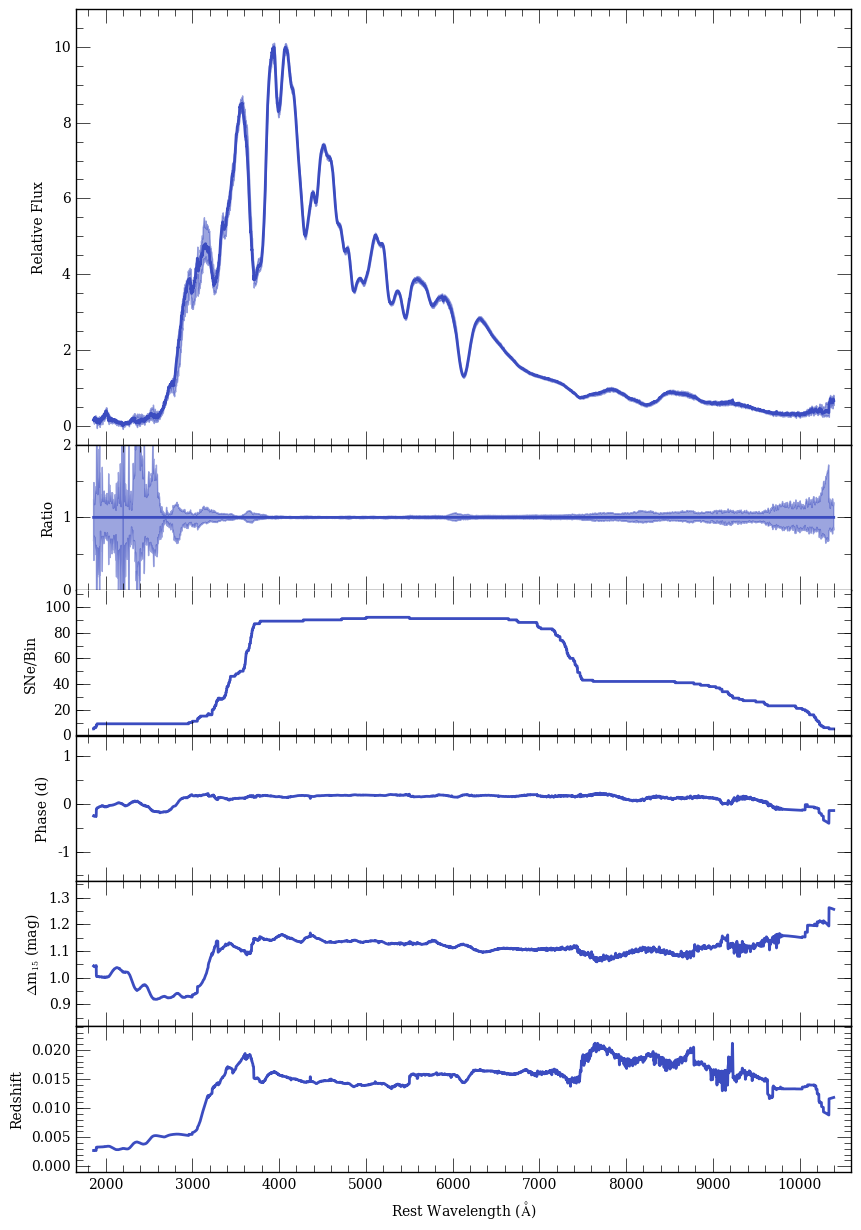

In [7]:
# query_db.set_min_num_spec(comps_host_max, 1)
query_db.comparison_plot(composites_max, scale_type=False, min_num_show=5, savename='main_composites_updated/maximum_light_all_dm15')
# query_db.comparison_plot(composites_max, scale_type=False, min_num_show=5)
# query_db.comparison_plot(composites_max, scale_type=False, min_num_show=10, legend_labels = ['$-1 \leq$ phase $\leq 1$ (days)'])

In [8]:
query_strings_all = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10 and phase < -9",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -9 and phase < -8",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8 and phase < -7",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7 and phase < -6",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6 and phase < -5",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -5 and phase < -4",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4 and phase < -3",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -3 and phase < -2",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -2 and phase < -1",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase < 0",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 0 and phase < 1",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 1 and phase < 2",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 2 and phase < 3",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 3 and phase < 4",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 4 and phase < 5",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 5 and phase < 6",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 6 and phase < 7",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 7 and phase < 8",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 8 and phase < 9",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 9 and phase < 10",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 10 and phase < 11",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 11 and phase < 12",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 12 and phase < 13",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 13 and phase < 14",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 14 and phase < 15",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 15 and phase < 16",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 16 and phase < 17",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 17 and phase < 18",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 18 and phase < 19",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 19 and phase < 20",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 20 and phase < 21",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 21 and phase < 22",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 22 and phase < 23",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23 and phase < 24",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 24 and phase < 25",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 25 and phase < 26",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 26 and phase < 27",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 27 and phase < 28",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 28 and phase < 29",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29 and phase < 30",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 30 and phase < 32",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 32 and phase < 34",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 34 and phase < 36",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 36 and phase < 38",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 38 and phase < 40",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 40 and phase < 42",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 42 and phase < 44",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 44 and phase < 46",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 46 and phase < 49",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 49 and phase < 52",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 52 and phase < 55",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 55 and phase < 58",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 58 and phase < 61",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 61 and phase < 65",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 65 and phase < 70",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 70 and phase < 78",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 78 and phase < 88",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 88 and phase < 98",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 98 and phase < 125",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 125 and phase < 180",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 180"
                ]

In [9]:
#changeable phase bin size
query_strings = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10."]
max_phase = 16.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    query_strings.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f"% (p1,p2))
    p1 += k
    p2 += k
print query_strings

['SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10.', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -4.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -2.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -2.000000 and phase < 0.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 0.000000 and phase < 2.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 2.000000 and phase < 4.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 4.000000 and phase < 6.000000', 'SELECT

In [10]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query_strings), query_strings, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10.
ERROR:  sn2006oa-20061116-not.dat None
97 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 96, 'spectra left')
(0, 'Peculiar Ias removed', 96, 'spectra left')
84 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination
35 total SNe
removed SNe without host corrections
Using 82 spectra of 34 SNe


gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 21 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000
ERROR:  2002bo_20020314_0_2_00.dat None
122 Total Spectra found
105 questionable files currently ignored
(2, 'questionable spectra removed', 120, 'spectra left')
(3, 'Peculiar Ias removed', 117, 'spectra left')
100 valid spectra found
Arrays cleaned
3 spectra may have telluric contamination
54 total SNe
removed SNe without host corrections
Using 97 spectra of 52 SNe
Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000
162 Total Spectra found
105 questionable files currently ignored
(4, 'questionable spectra removed', 158, 'spectra left')
(2, 'Peculiar Ias removed', 156, 'spectr

In [11]:
composites_med, sn_arrays_med, boot_sn_arrays_med = query_db.main(len(query_strings), query_strings, boot='b', medmean=2, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10.
ERROR:  sn2006oa-20061116-not.dat None
97 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 96, 'spectra left')
(0, 'Peculiar Ias removed', 96, 'spectra left')
84 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination
35 total SNe
removed SNe without host corrections
Using 82 spectra of 34 SNe
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000
ERROR:  2002bo_20020314_0_2_00.dat None
122 Total Spectra found
105 questionable files currently ignored
(2, 'questionable spectra removed', 120, 'spectra left')
(3, 'Peculiar Ias removed', 117, 'spectra left')
100 valid spectra found
Arrays cleaned
3 spectra may have telluric contamination
54 total SNe
removed SNe without host corrections
Using 97 spe

In [12]:
sn_arr = sn_arrays[0]
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])
print np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2])
print 1./np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])*np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))

0.275466073248
10533.6761542
0.00974338848268
28.2721020247


In [13]:
def stacked_plot(composites, boot=True, name = '', savename=None):
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(1,1)
#     ax.get_yaxis().set_ticks([])
#     plt.ylim([-311,12])
    plt.ylabel('Relative Flux + Constant', fontsize = 20)
    plt.xlabel('Rest Wavelength ' + "($\mathrm{\AA}$)", fontsize = 20)
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
#     fig.set_size_inches(10.5, 80.5, forward = True) #long plot
#     fig.set_size_inches(10.5, 7.5, forward = True)
    fig.set_size_inches(10, 15, forward = True) #paper plot
    plt.gca().axes.yaxis.set_ticklabels([])

    i = 0
    if boot:
        lw=3
    else:
        lw=3
    for comp in composites:
        phase = np.average(comp.phase_array[comp.x1:comp.x2])
#         buff = 200*np.log10(phase+20)
        buff  = i
        ax.plot(comp.wavelength[comp.x1:comp.x2], 2.*comp.flux[comp.x1:comp.x2] - buff, color = '#3F5D7D', linewidth = lw)
        if boot:
            plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2]- buff, comp.up_conf[comp.x1:comp.x2] - buff, alpha = 0.5)
        if phase < 0:
            plt.text(10850, comp.flux[comp.x2] - buff+ .1, " $-$%2.1f" % (np.absolute(phase)), fontname='stixsans', horizontalalignment = 'right')
        else:
            plt.text(10850, comp.flux[comp.x2] - buff+ .1, " %+2.1f" % (phase), fontname='stixsans', horizontalalignment = 'right')
#         plt.title('All Phase Composite Spectra', fontdict = font1, fontsize = 40)
        i+=1
    plt.ylim([len(composites)*-1., 2.9])
    plt.xlim([3000, 11000])
#     majorLocator = MultipleLocator(1000)
#     majorFormatter = FormatStrFormatter('%i')
    minorLocator = MultipleLocator(200)
    plt.gca().axes.xaxis.set_major_locator(MaxNLocator(integer=True))
#     plt.gca().axes.xaxis.set_major_formatter(majorFormatter)
#     plt.gca().axes.xaxis.set_minor_locator(minorLocator)
    labels=plt.gca().axes.get_xticks().tolist()
    new_labels = []
    for s in labels:
        new_labels.append(str(int(s)))
    labels = new_labels
    labels[0]=''
    labels[-1]=''
#     labels[1]=''
#     labels[-2]=''
    print labels
    plt.gca().set_xticklabels(labels)
#     plt.savefig('../../../Paper_Drafts/main_composites_updated/all_t_spec_eq_spaced_long.pdf', dpi = 300, bbox_inches = 'tight')
#     plt.savefig('../../FLASH/t_spec_eq_spaced'+name+'.png', dpi = 400, bbox_inches = 'tight')
    if savename is not None:
        plt.savefig('../../../Paper_Drafts/'+ savename, dpi = 300, bbox_inches = 'tight')
    plt.show()

In [14]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot='nb', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10
ERROR:  sn2006oa-20061116-not.dat None
97 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 96, 'spectra left')
(0, 'Peculiar Ias removed', 96, 'spectra left')
84 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination
35 total SNe
removed SNe without host corrections
Using 82 spectra of 34 SNe
Gini balancing...
Balanced after 21 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10 and phase < -9
ERROR:  2002bo_20020314_0_2_00.dat None
49 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 48, 'spectra left')
(1, 'Peculiar Ias removed', 47, 'spectra left')
43 valid spectra found
Arrays cleaned
1 spectra may have telluric contamination
36 total SNe
removed SNe without host corrections
Using 42 spectra of 35 SNe
Gini balancing...
Bala

In [15]:
import composite
# query_db.set_min_num_spec(composites, 5)
query_db.set_min_num_spec(composites_all, 5)
# print len(composites), len(composites_all)
# print np.average(composites_all[16].phase_array[composites_all[16].x1:composites_all[16].x2])
# plt.plot(composites_all[16].wavelength, composites_all[16].flux)
# plt.show()

In [16]:
# sub_list_1 = composites_all[0:16]
# sub_list_2 = composites_all[16:33]
# sub_list_3 = composites_all[33:50]
# sub_list_4 = composites_all[50:57]
# sub_list_5 = composites_all[57:]
i = 5
sub_list_1 = composites_all[0:5]
sub_list_2 = composites_all[5:10]
sub_list_3 = composites_all[10:15]
sub_list_4 = composites_all[15:20]
sub_list_5 = composites_all[20:25]
sub_list_6 = composites_all[25:30]
sub_list_7 = composites_all[30:35]
sub_list_8 = composites_all[35:40]
sub_list_9 = composites_all[40:45]
sub_list_10 = composites_all[45:50]
sub_list_11 = composites_all[50:55]
sub_list_12 = composites_all[55:60]
sub_list_13 = composites_all[60:]

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


C:\Program Files\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'stixsans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


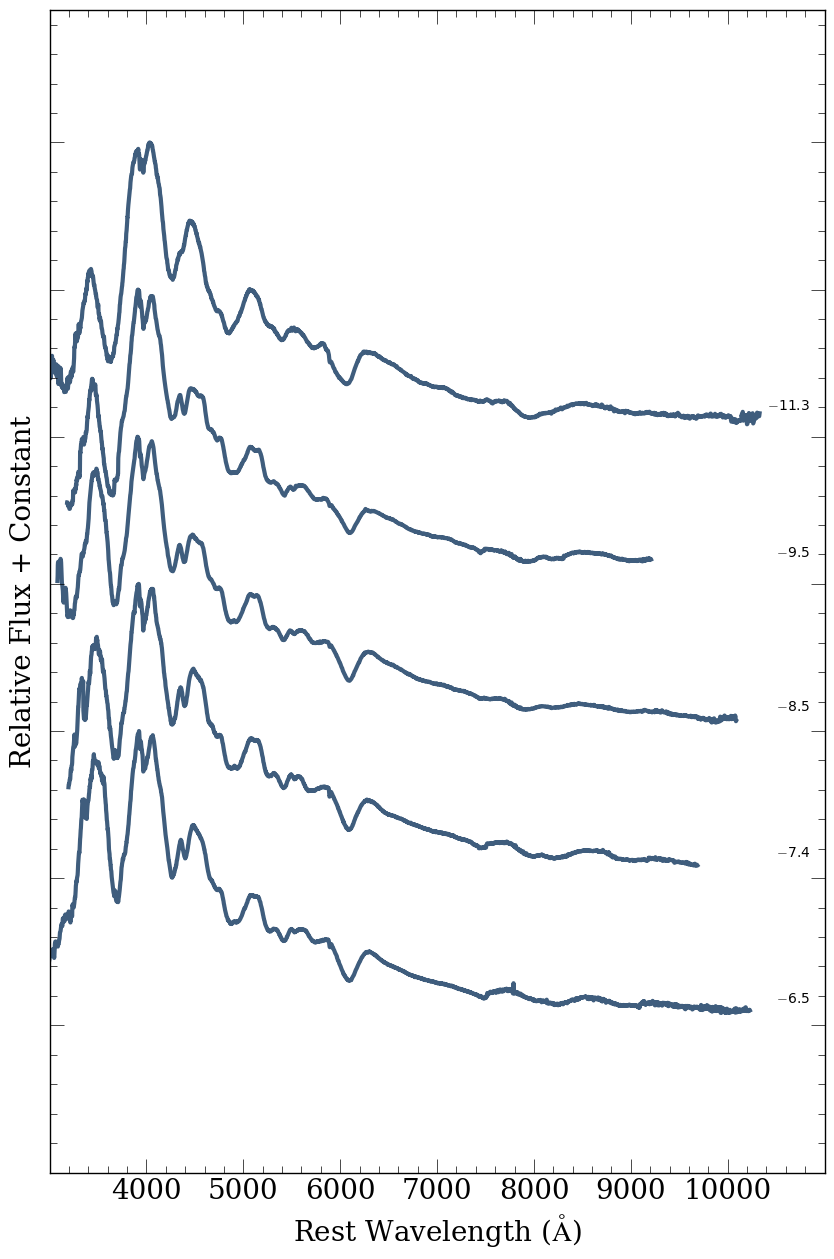

In [17]:
stacked_plot(sub_list_1, boot=False, name = '1')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


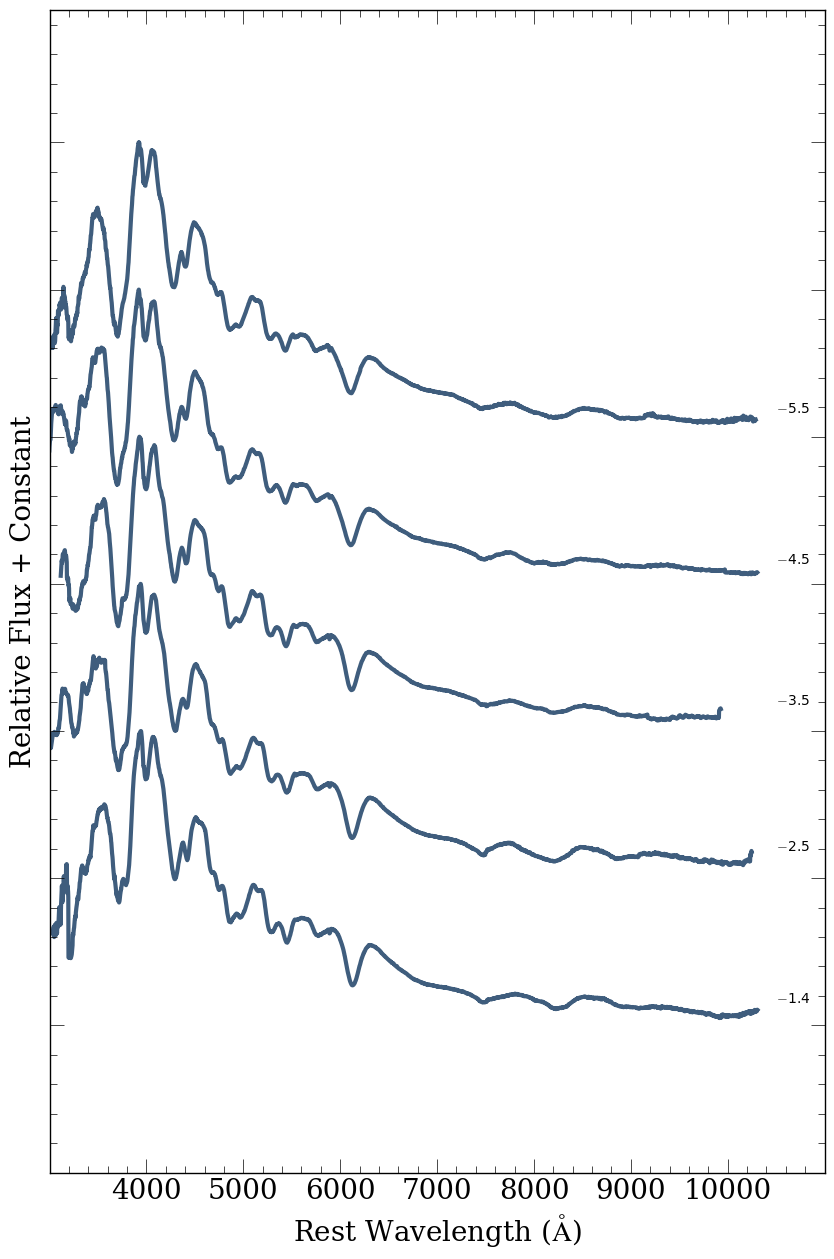

In [18]:
stacked_plot(sub_list_2, boot=False, name = '2')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


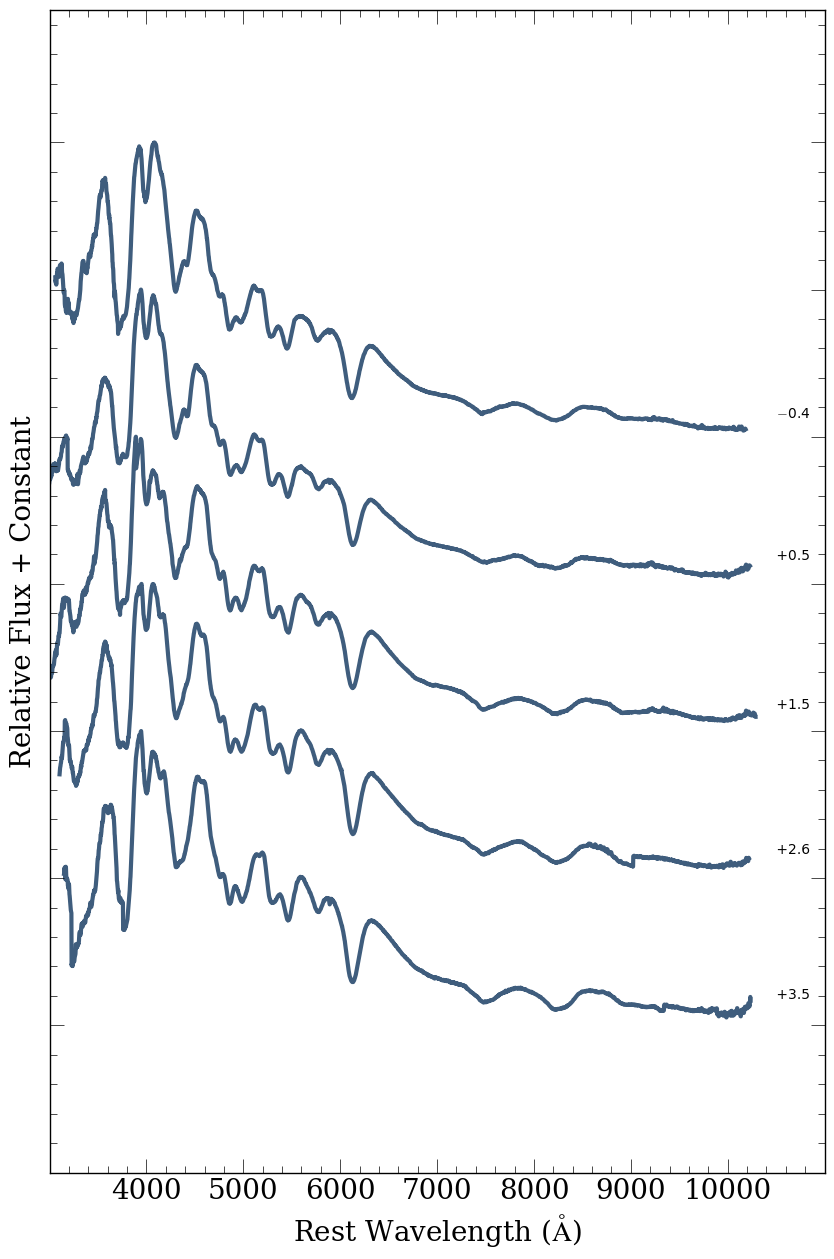

In [19]:
stacked_plot(sub_list_3, boot=False, name = '3')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


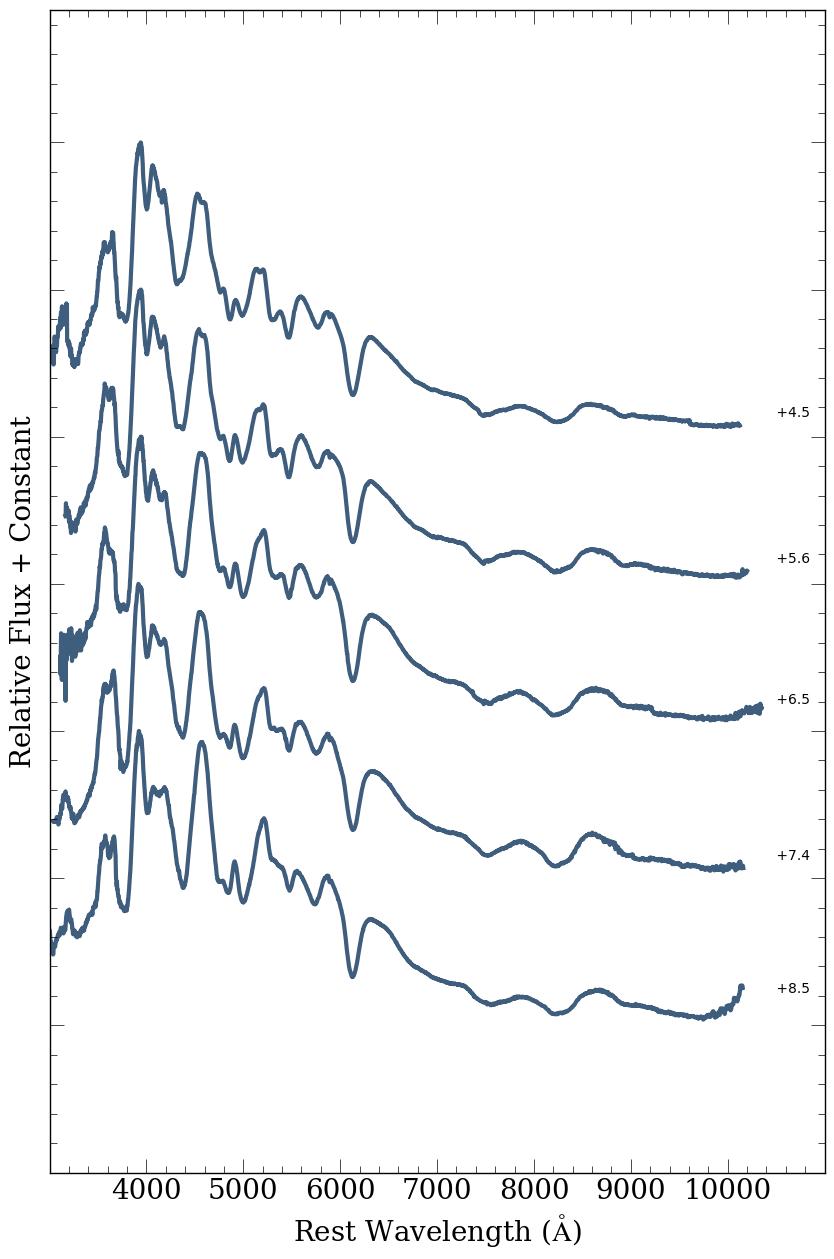

In [20]:
stacked_plot(sub_list_4, boot=False, name = '4')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


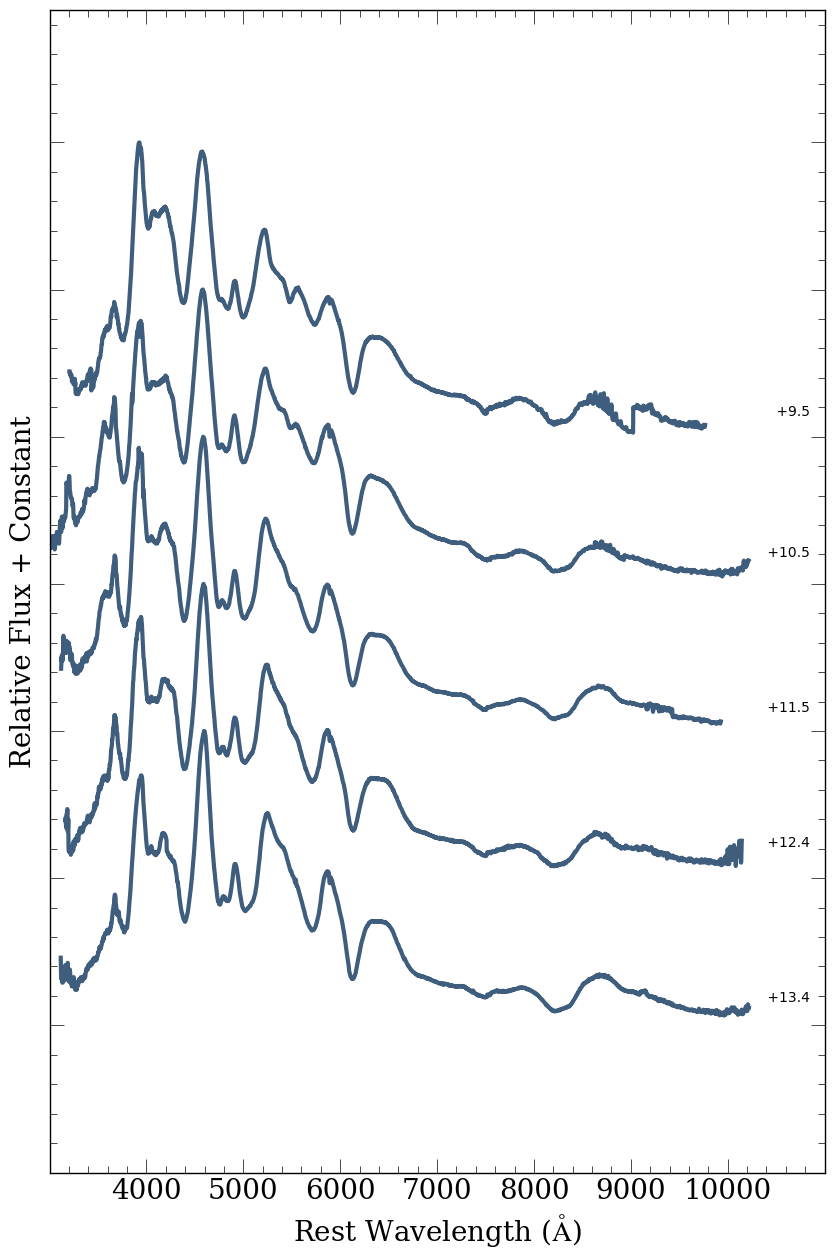

In [21]:
stacked_plot(sub_list_5, boot=False,name = '5')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


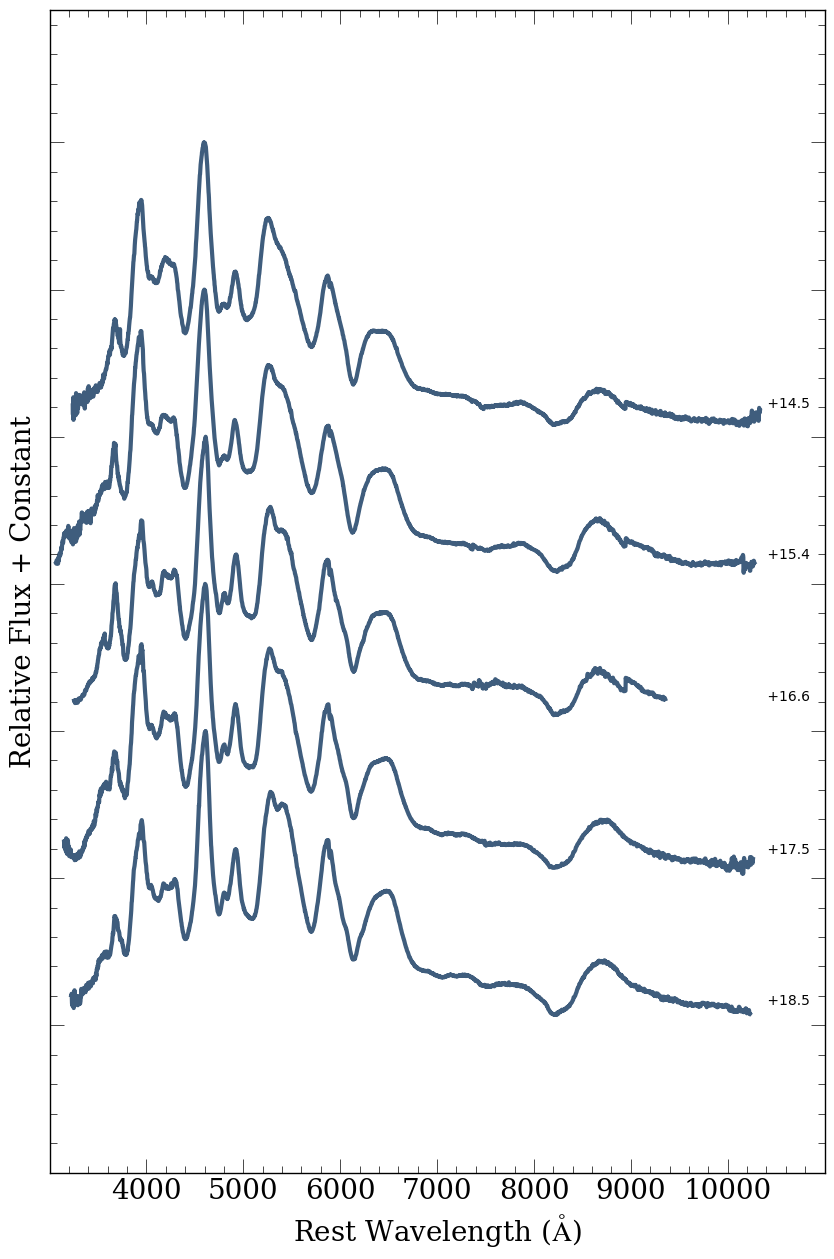

In [22]:
stacked_plot(sub_list_6, boot=False,name = '6')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


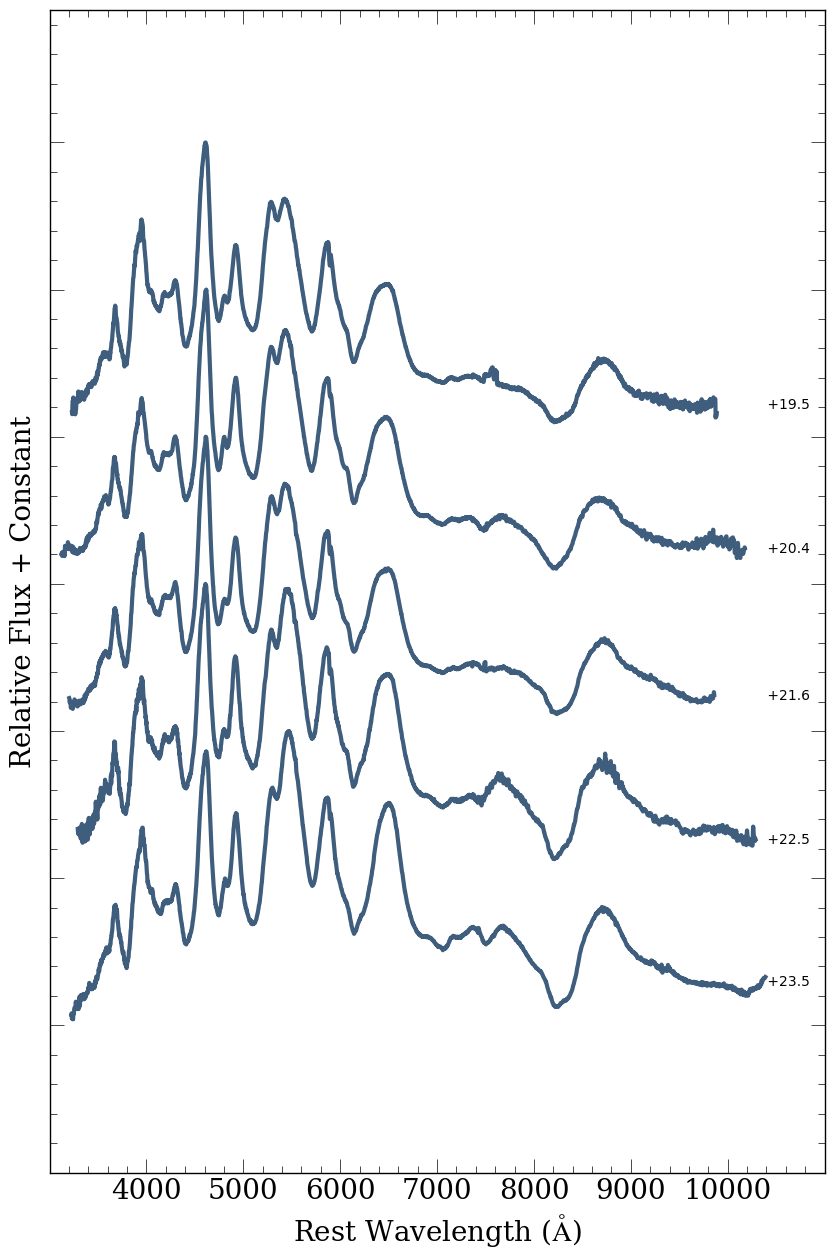

In [23]:
stacked_plot(sub_list_7, boot=False,name = '7')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


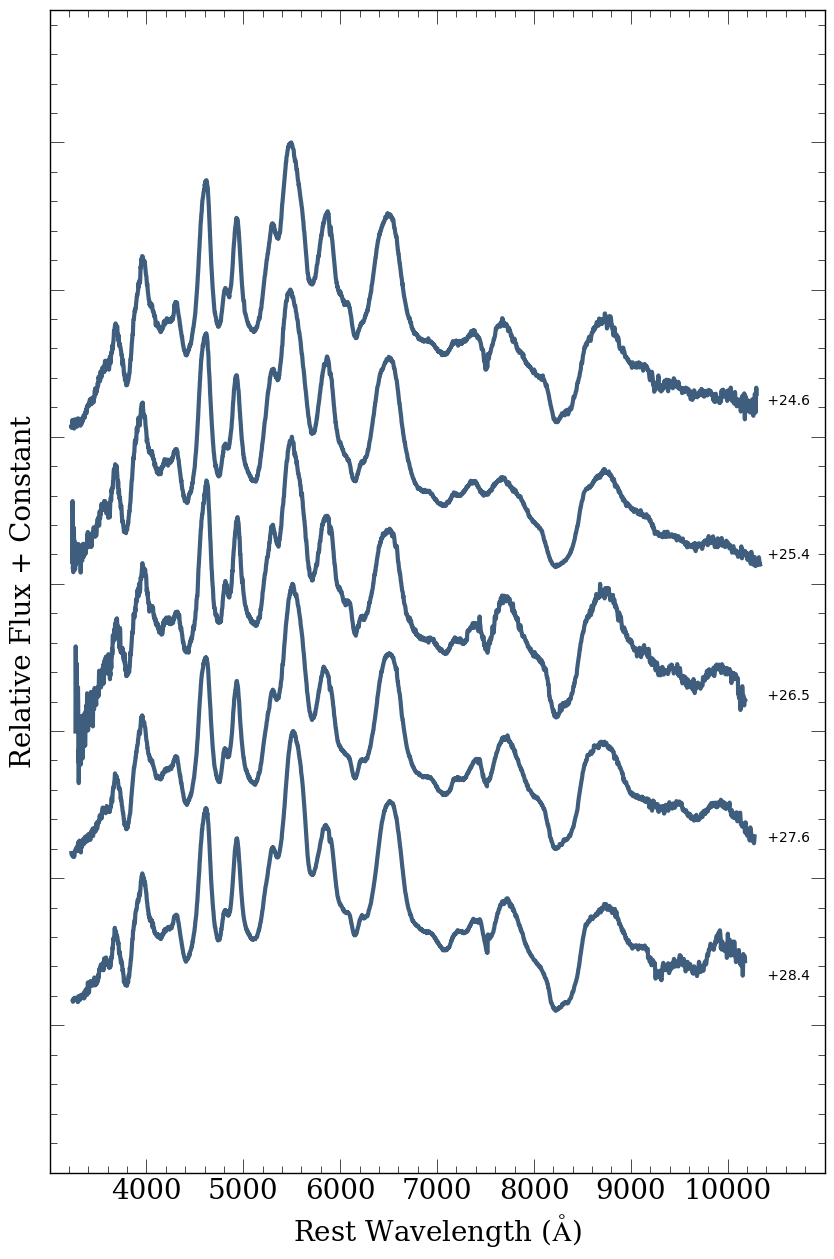

In [24]:
stacked_plot(sub_list_8, boot=False,name = '8')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


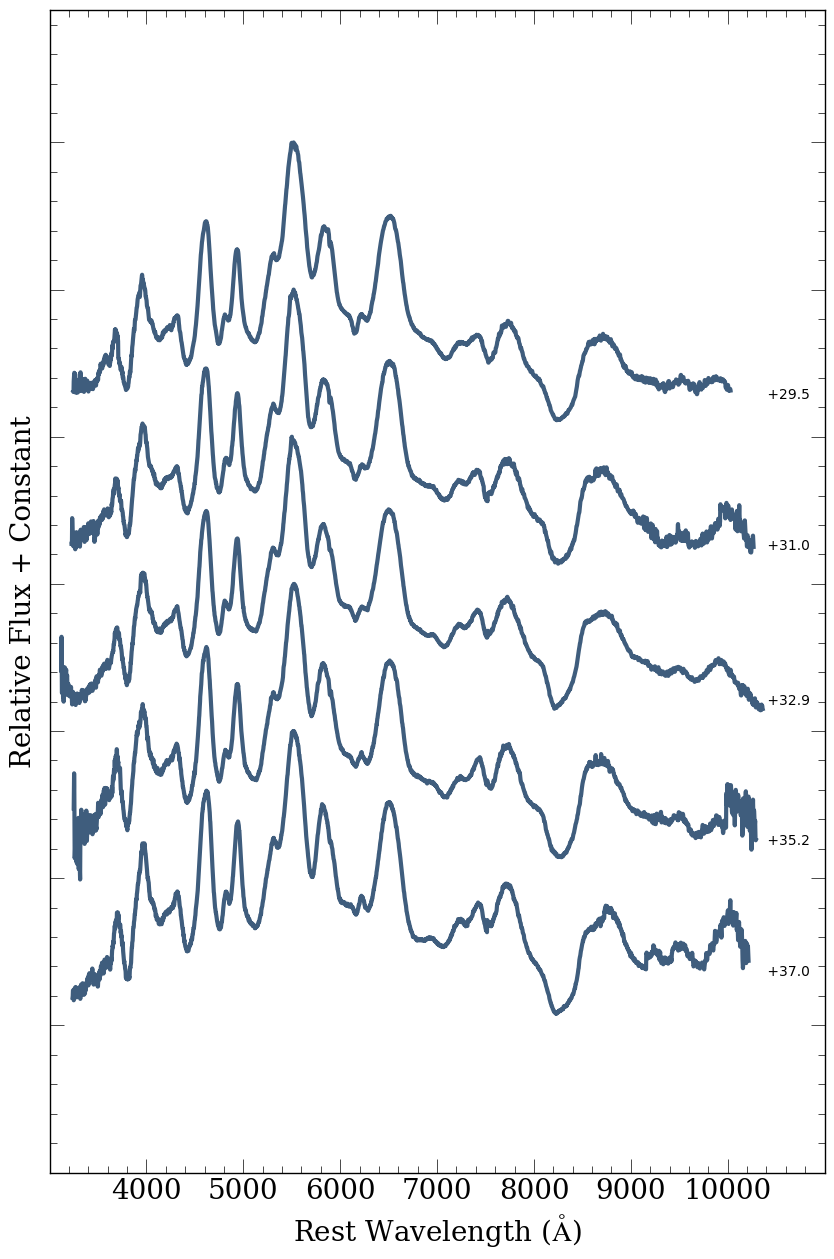

In [25]:
stacked_plot(sub_list_9, boot=False,name = '9')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


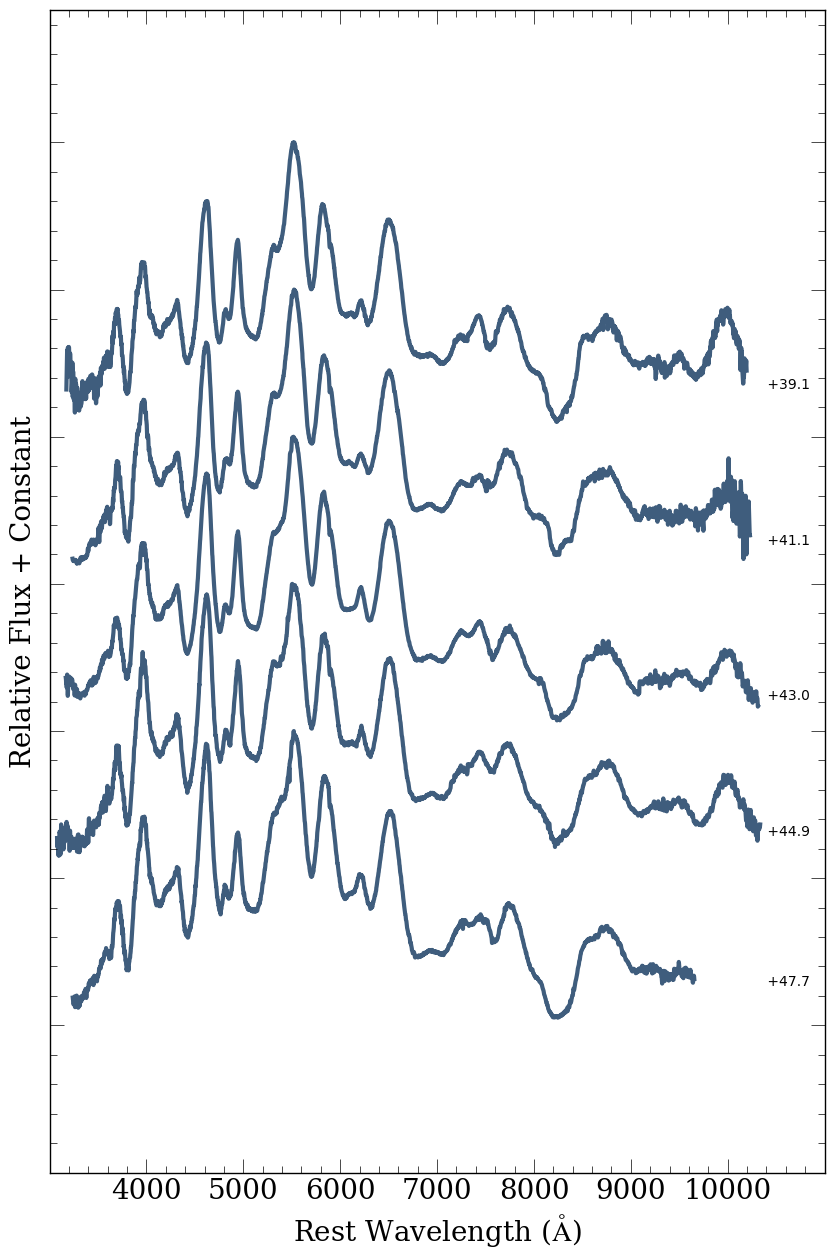

In [26]:
stacked_plot(sub_list_10, boot=False,name = '10')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


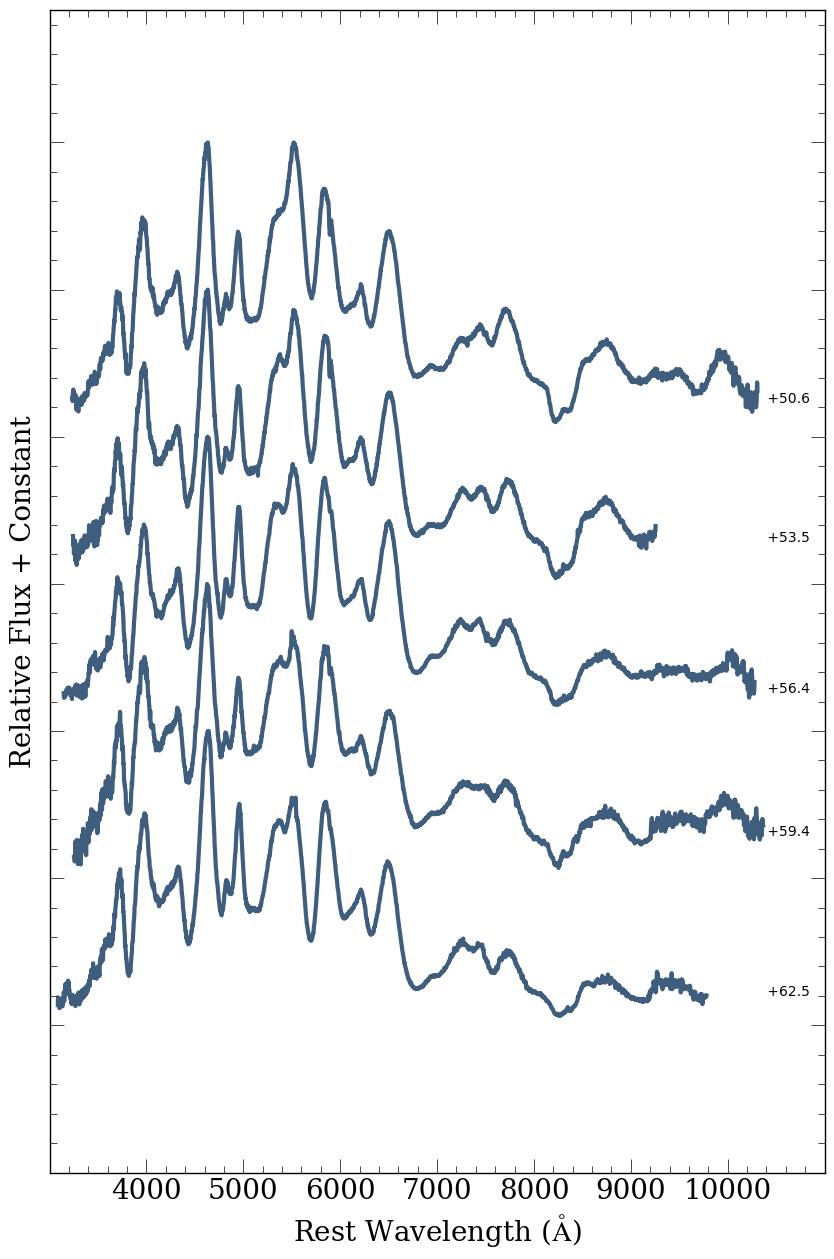

In [27]:
stacked_plot(sub_list_11, boot=False,name = '11')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


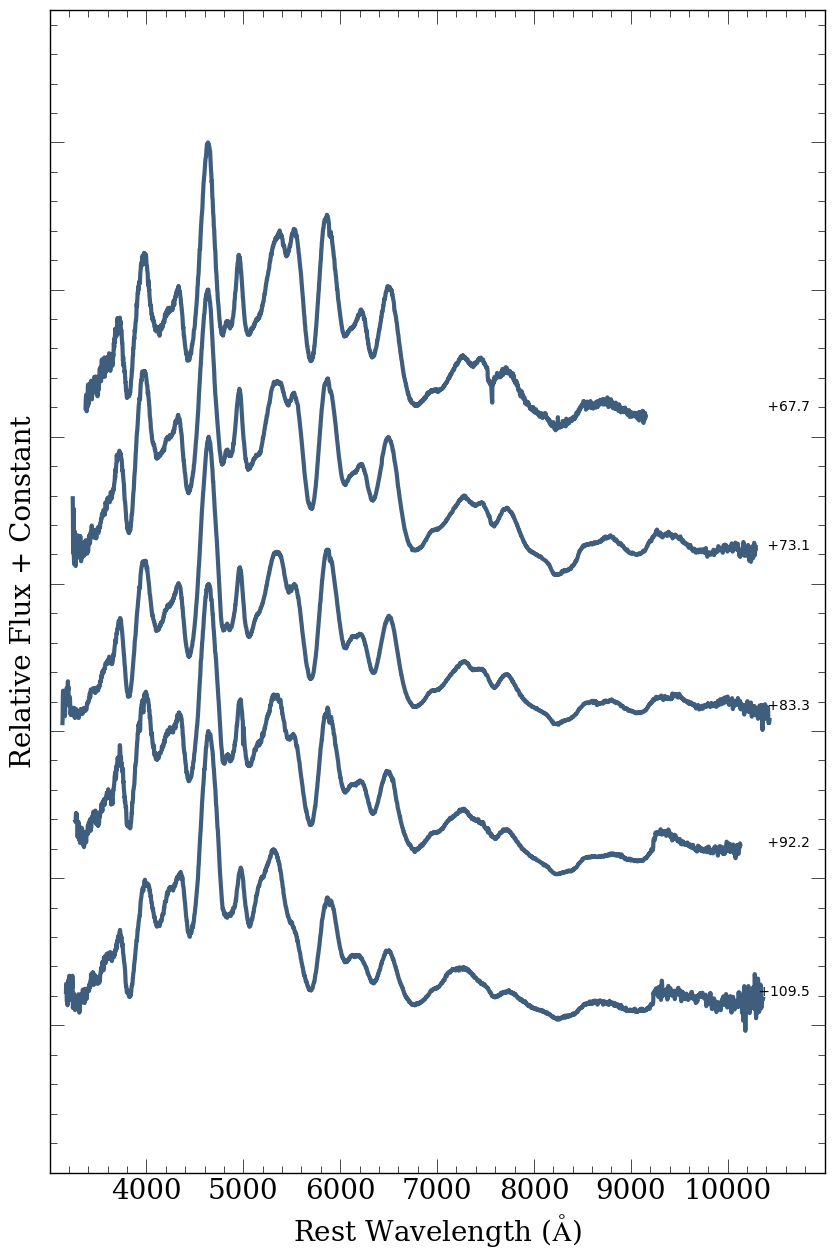

In [28]:
stacked_plot(sub_list_12, boot=False,name = '12')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


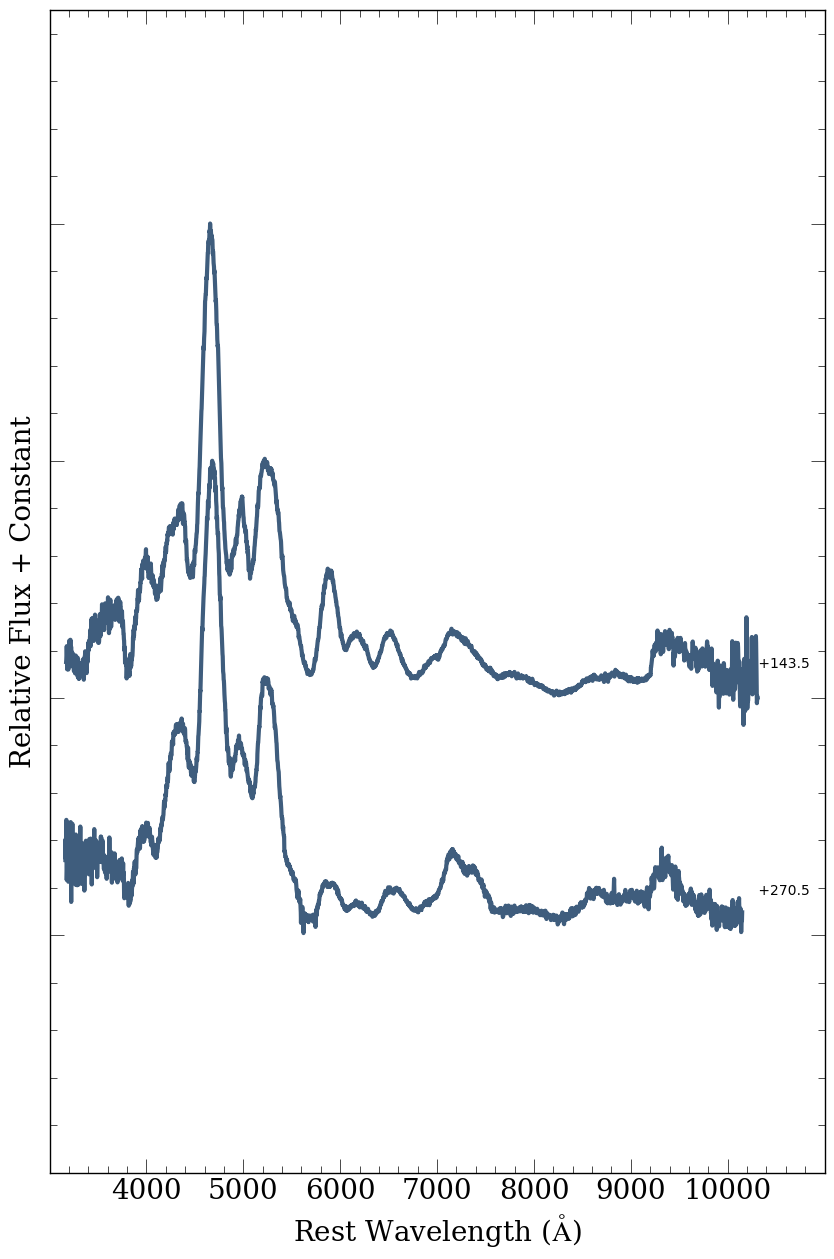

In [29]:
stacked_plot(sub_list_13, boot=False,name = '13')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


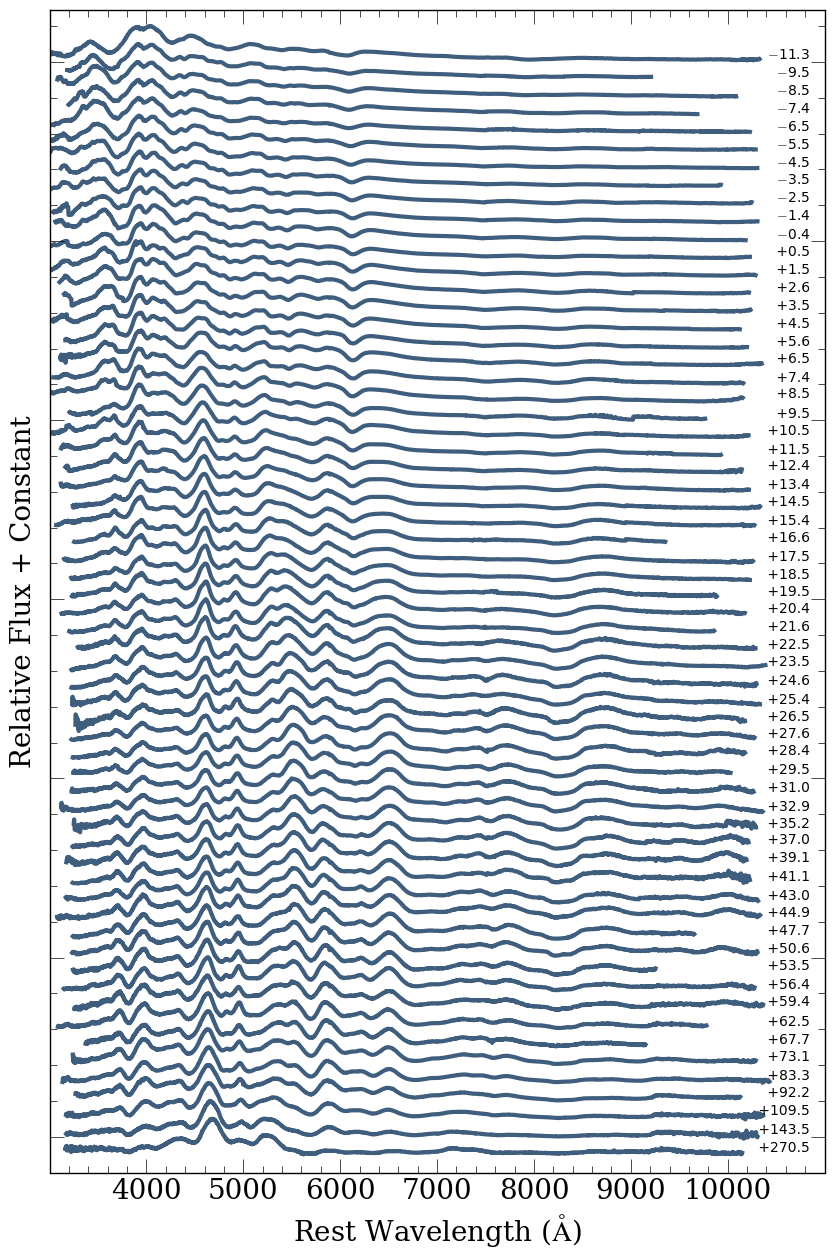

In [31]:
stacked_plot(composites_all, boot=False, name = 'all', savename='main_composites_updated/all_t_spec_eq_spaced.pdf')
# stacked_plot(composites_all[0:60], boot=False, name = 'all')

In [32]:
# query_db.plot_comp_and_all_spectra(composites[3],sn_arrays[3])

In [33]:
velocities = []
phases = []
dm15s = []
# weak_velocities = []
for comp in composites:
# for comp in composites:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.average(comp.dm15_array[comp.x1:comp.x2]),2)
    v= sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900, 6300)[0]/1000.
#     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
#     weak_velocities.append(wv)
    velocities.append(v)
    phases.append(p)
    dm15s.append(dm15)

In [34]:
velocities_med = []
phases_med = []
dm15s_med = []
# weak_velocities = []
for comp in composites_med:
# for comp in composites:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.average(comp.dm15_array[comp.x1:comp.x2]),2)
    v= sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900, 6300)[0]/1000.
#     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
#     weak_velocities.append(wv)
    velocities_med.append(v)
    phases_med.append(p)
    dm15s_med.append(dm15)

[1.01, 1.04, 1.1000000000000001, 1.1299999999999999, 1.1799999999999999, 1.1599999999999999, 1.1100000000000001, 1.2, 1.1599999999999999, 1.1699999999999999, 1.1399999999999999, 1.1599999999999999, 1.1200000000000001, 1.1000000000000001]
[13.844386596703625, 12.565078947331452, 12.466877315828722, 11.584391974690631, 11.290762120068109, 10.997398333424474, 10.801970321149453, 10.801970321149453, 10.606660605734399, 10.801970321149453, 10.704300675253513, 10.801970321149453, 10.606660605734399, 10.704300675253513]


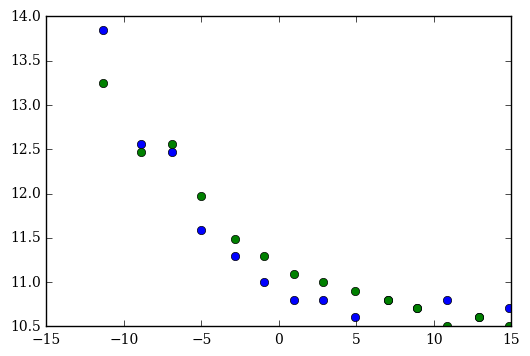

In [35]:
print dm15s
print velocities
plt.plot(phases, velocities, 'o')
plt.plot(phases, velocities_med, 'o')
# plt.plot(phases, weak_velocities, 'o')
plt.show()

In [36]:
boot_velocities = []
# boot_phases = []
# boot_dm15s = []
errors  = []
# weak_velocities = []
for k in range(len(boot_sn_arrays[0:27])):
# for k in range(len(boot_sn_arrays)):
    vels = []
#     bphases = []
#     bdm15s = []
    print k
    for comp in boot_sn_arrays[k]:
#         p = np.average(comp.phase_array[comp.x1:comp.x2])
        v, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], 5900., 6300.)
        v = v/1000.
    #     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
    #     weak_velocities.append(wv)
        vels.append(v)
#         bphases.append(p)
#         bdm15s.append(dm15)
    boot_velocities.append(vels)
#     boot_phases.append(bphases)
#     boot_dm15s.append(bdm15s)
    errors.append(np.nanstd(vels))

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [37]:
boot_velocities_med = []
# boot_phases = []
# boot_dm15s = []
errors_med  = []
# weak_velocities = []
for k in range(len(boot_sn_arrays_med[0:27])):
# for k in range(len(boot_sn_arrays)):
    vels = []
#     bphases = []
#     bdm15s = []
    print k
    for comp in boot_sn_arrays_med[k]:
#         p = np.average(comp.phase_array[comp.x1:comp.x2])
        v, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], 5900., 6300.)
        v = v/1000.
    #     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
    #     weak_velocities.append(wv)
        vels.append(v)
#         bphases.append(p)
#         bdm15s.append(dm15)
    boot_velocities_med.append(vels)
#     boot_phases.append(bphases)
#     boot_dm15s.append(bdm15s)
    errors_med.append(np.nanstd(vels))

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [38]:
all_phases = []
all_vels = []
bad_vels = ['1995bd','2012cg','1991t','1998ab','2006oa','2009ig','2012fr','1995ac', '2001ah',
            '1997br','2008ia','2012ht','2007sr','2002do','2007ax','2003fa','1998aq','2011fe',
            '2003ai', '2005eq', '2002hu', '2002fk', '2005m', '2008r']
bad_files = ['sn1999aa-19990213.35-fast.flm', 'sn1998es-19981115.25-fast.flm', 'sn1999dq-19990905.45-fast.flm']
i=0
sn_arr = sn_arrays[0:27][0]
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])
print np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2])
print 1./np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])*np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
for sn_arr in sn_arrays[0:27]:
# for sn_arr in sn_arrays:
    print i
    phase_bin = []
    vel_bin = []
    for SN in sn_arr:
        if SN.name not in bad_vels and SN.name.split('_')[0] not in bad_vels and SN.filename not in bad_files and SN.source != 'swift_uv':
            p = SN.phase
            var = 1./SN.ivar
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            v, si_min_wave = sa.measure_velocity(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], 5900., 6300., vexp=vexp)
            print SN.filename, vexp, SNR, SN.SNR, v, p
            phase_bin.append(p)
            vel_bin.append(v)
        else:
            phase_bin.append(np.nan)
            vel_bin.append(np.nan)
    all_phases.append(phase_bin)
    all_vels.append(vel_bin)
    i+=1

0.275466073248
10533.6761542
0.00974338848268
28.2721020247
0


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in divide


None 0.002 42.2684021408 467.514630555 13943.0014325 -11.3358233467
None 0.0045 1.28058645176 1.84758919278 nan -11.9828332955
None 0.003 34.6232815707 331.302419815 15227.6771866 -11.7264429934
None 0.001 124.242769116 134.298958916 13548.7190815 -11.7240168396
None 0.0015 92.5781453757 95.2179641221 17911.7471604 -11.1869042522
None 0.003 35.3964434691 193.514681539 12761.5708032 -10.2138835878
None 0.0015 61.9833219807 93.6269808028 18711.141007 -11.3512310991
None 0.002 52.8621887498 458.74866178 12565.0789473 -12.4494187309
None 0.002 59.1134979848 68.0941300817 11976.3122233 -12.6531247112
None 0.003 36.3369858289 191.5225323 16716.1804052 -11.3824944195
None 0.001 104.800161933 112.594605149 13253.3171132 -11.656008646
None 0.0015 61.0163127094 70.4140072843 15326.7046696 -10.2606592413
None 0.002 53.461477375 115.241082686 20617.2210021 -11.2028500055
None 0.0015 78.5077405236 196.309061328 16119.9845323 -12.4482717326
sn1998dm-19980824-br-corrected.flm 0.0015 80.1603038031 118

In [39]:
#errors after culling bad measurements. Need to change if updting composite method
# errors[2] = .291
# errors[7] = .127
# errors[8] = .127
# errors_med[4] = .144

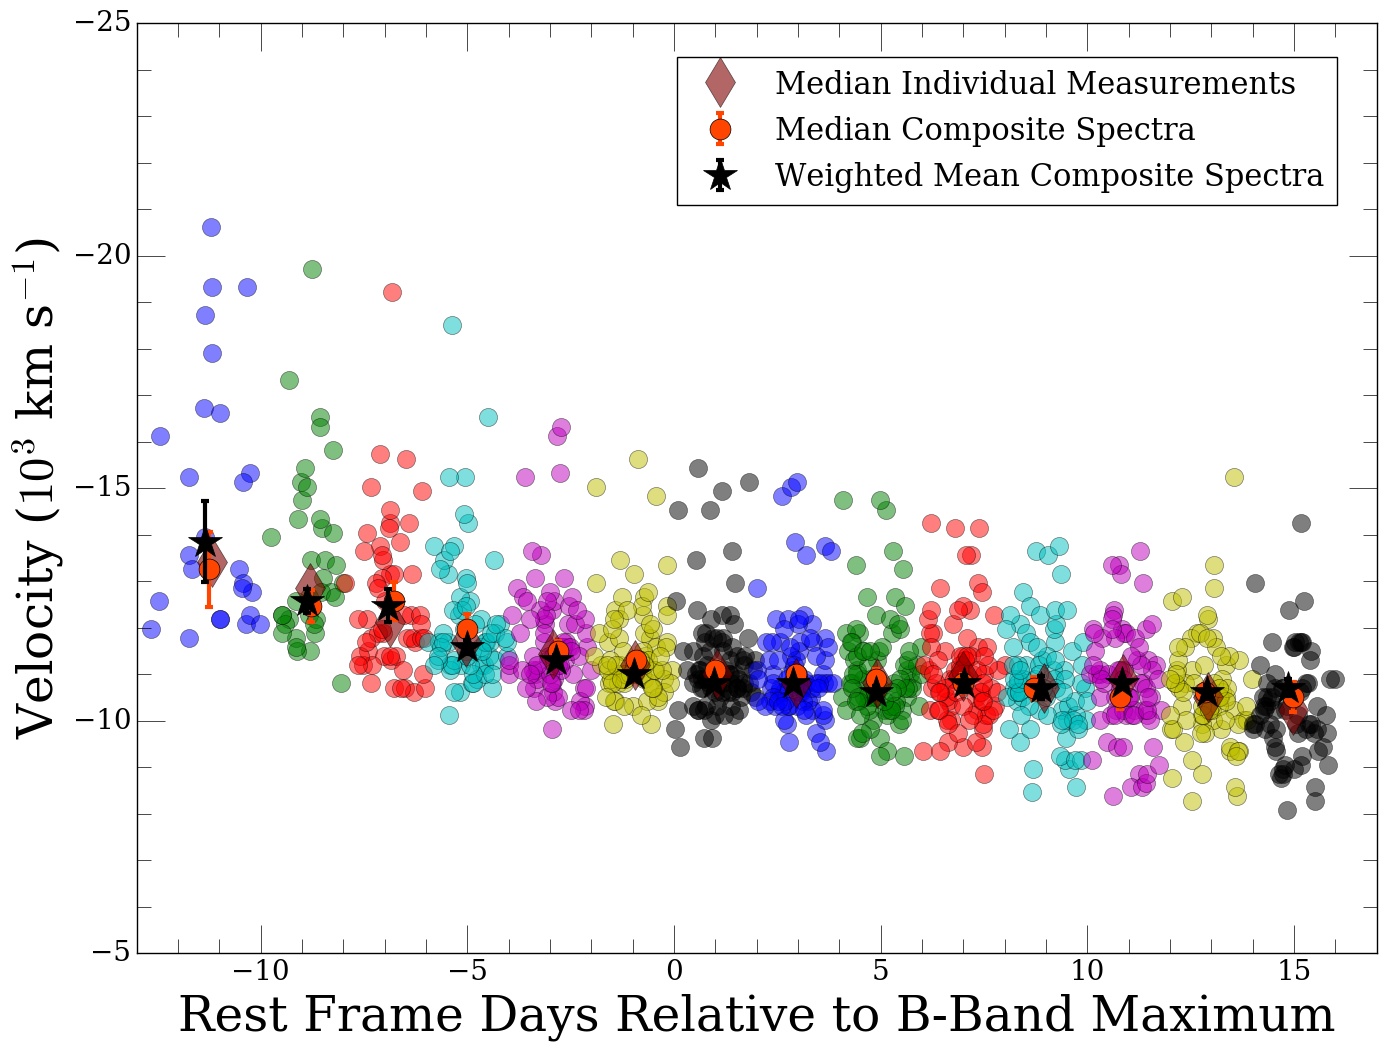

In [46]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Velocity ($10^3$ km s$^{-1}$)', fontsize = 35)
plt.xlabel('Rest Frame Days Relative to B-Band Maximum', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
vel_bin_medians = []
phase_bin_medians = []
for i in range(len(all_phases)):
    phase_bin_medians.append(np.nanmedian(all_phases[i]))
    vel_bin_medians.append(np.nanmedian(all_vels[i])/-1000.)
    plt.plot(all_phases[i], np.asarray(all_vels[i])/-1000., 'o', alpha=.5, markersize=13, zorder=-1)
plt.plot(phase_bin_medians, vel_bin_medians, 'd', markersize=25, alpha=.6, color = 'maroon', label='Median Individual Measurements', zorder = -.9)
plt.errorbar(phases_med, -1.*np.asarray(velocities_med), yerr=errors_med, color = 'orangered',fmt='o', markersize=15, elinewidth=3, capthick=3,  label='Median Composite Spectra', zorder = -.8)
plt.errorbar(phases, -1.*np.asarray(velocities), yerr=errors, fmt='k*', markersize=25, elinewidth=3, capthick=3, label='Weighted Mean Composite Spectra', zorder = -.7)
# plt.savefig('../../../Paper_Drafts/main_composites/velocity.pdf', dpi = 300, bbox_inches = 'tight')
plt.xlim([-13,17])
plt.ylim([-25,-5])
plt.gca().invert_yaxis()
# plt.legend(loc=1, fontsize = 20, numpoints=1)
plt.legend( loc=1, bbox_to_anchor=(0.5, 0.5, 0.48, 0.48), fontsize=22, numpoints=1)
# plt.ylim([8,22])
plt.savefig('../../../Paper_Drafts/main_composites_updated/velocity_2_day_cut.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/velocity_2_day_cut.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [41]:
import numpy as np

0.215564356628
0.133359811015


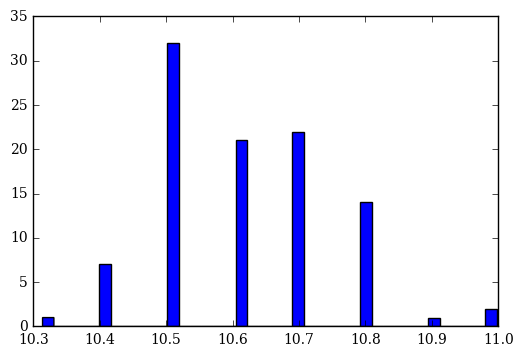

In [42]:
print np.nanstd(boot_velocities_med[4])
new_vs = []
for v in boot_velocities[8]:
    if ~np.isnan(v) and v < 16:
        new_vs.append(v)
print np.nanstd(new_vs)
# plt.hist(np.asarray(boot_velocities[8])[~np.isnan(np.asarray(boot_velocities[8]))], bins=40)
plt.hist(new_vs, bins=40)
plt.show()

In [24]:
check_SN_vels = []
j = 0
for i in range(len(all_vels)):
    for k in range(len(all_vels[i])):
        v = all_vels[i][k]
        SN = sn_arrays[i][k]
#         if v/1000. > 17:
        if SN.phase < 6 and v < 9000:
            print j, SN.name, SN.filename, SN.phase, SN.redshift, SN.velocity, v/1000.
            check_SN_vels.append(SN)
            j+=1

0 1995bd_combined None -9.03504590922 0.0146 -99.0 7.40114355379
1 1991t_combined None -9.21932582951 0.005791 -9.62359 2.70098746925
2 1997br_combined None -6.92887892598 0.005961 -11.5998 2.98670472716
3 1995ac_combined None -5.66132705119 0.050055 None 6.05097447411
4 2002hu_combined None -5.76531935835 0.03 -9.87507 8.27217709296
5 2005m_combined None 0.64653034079 0.0236865440633 -8.09394 7.98156591068
6 2008r_combined None 2.75332787871 0.0135 -10.2992 7.11133246088
7 2005m_combined None 4.72812700526 0.024195701758 -8.09394 7.78797326174


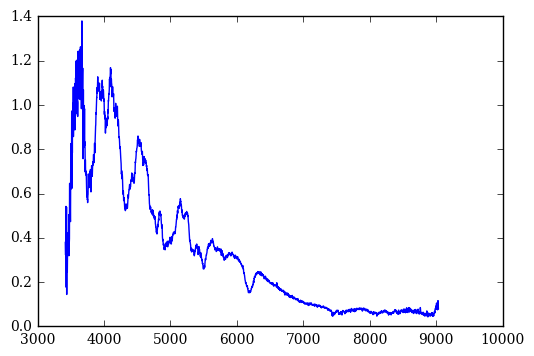

In [32]:
plt.plot(check_SN_vels[7].wavelength, check_SN_vels[7].flux)
plt.show()

In [ ]:
SN = check_SN_vels[13]
sa.measure_velocity(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], 5900., 6300.)

## Zoom In Plots

In [43]:
import matplotlib.gridspec as gridspec

In [44]:
def zoom_in_plot(lst):
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(1,1)
    
#     ax.get_yaxis().set_ticks([])
#     plt.ylim([-311,12])
    plt.ylabel('Relative Flux + Const.', fontsize = 20)
    plt.xlabel('Rest Wavelength ' + "($\mathrm{\AA}$)", fontsize = 20)
    fig.set_size_inches(8.5, 11, forward = True)
    plt.gca().axes.yaxis.set_ticklabels([])
    
    
    ca_si_range = [3400., 4400.]
    si_range = [5500., 6500.]
    nir_trip_range = [7500., 9000]
    
    gs = gridspec.GridSpec(1, 3)
    fig.text(0.45, 0.08, 'Rest Wavelength ' + "($\mathrm{\AA}$)", ha='center', fontsize=15)
#     s_m = query_db.make_colorbar(lst)
    
    params = []
    for comp in lst:
        params.append(np.average(comp.phase_array[comp.x1:comp.x2]))

    norm = matplotlib.colors.Normalize(vmin=np.min(params),vmax=np.max(params))
    # c_m = matplotlib.cm.viridis
    c_m = matplotlib.cm.winter_r
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])
    
    i = 0
    for comp in lst:
        buff=i
        phase = np.average(comp.phase_array[comp.x1:comp.x2])
        
        ca_si_inds = np.where((comp.wavelength >= ca_si_range[0]) & (comp.wavelength <= ca_si_range[1]))
        si_inds = np.where((comp.wavelength >= si_range[0]) & (comp.wavelength <= si_range[1]))
        nir_trip_inds = np.where((comp.wavelength >= nir_trip_range[0]) & (comp.wavelength <= nir_trip_range[1]))

        ca_si = plt.subplot(gs[0])
        ca_si.axes.set_title("Ca/Si", fontsize = 15)
        plt.xticks(rotation=0, fontsize = 10)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         ca_si.axes.xaxis.set_ticks(np.arange(ca_si_range[0], ca_si_range[1], 1000))
        plt.plot(comp.wavelength[ca_si_inds], 2.*comp.flux[ca_si_inds]- i, 'b-', linewidth = 4, color = s_m.to_rgba(phase))
        plt.ylabel('Relative Flux + Constant', fontsize = 15)
        
        si = plt.subplot(gs[1])
        si.axes.set_title("Si", fontsize = 15)
        plt.xticks(rotation=0, fontsize = 10)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         si.axes.xaxis.set_ticks(np.arange(si_range[0], si_range[1], 1000))
        plt.plot(comp.wavelength[si_inds], 5.*comp.flux[si_inds] - i, 'g-', linewidth = 4, color = s_m.to_rgba(phase))
        
        nir_trip = plt.subplot(gs[2])
        nir_trip.axes.set_title("Ca NIR Triplet", fontsize = 15)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.xticks(rotation=0, fontsize = 10)
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         nir_trip.axes.xaxis.set_ticks(np.arange(nir_trip_range[0], nir_trip_range[1], 1000))
        plt.plot(comp.wavelength[nir_trip_inds], 10.*comp.flux[nir_trip_inds] - i, 'r-', linewidth = 4, color = s_m.to_rgba(phase))
        
        i+=1
        
    cb = plt.colorbar(s_m, ax = fig.axes, aspect=50)
    cb.set_label('Phase (days)', fontsize = 15)
    cb.ax.tick_params(labelsize=10)
    cb.ax.invert_yaxis()
    
    ca_si.axes.set_ylim([len(composites)*-1. + 1., 2.3])
    si.axes.set_ylim([len(composites)*-1. + 1.5, 2.25])
    nir_trip.axes.set_ylim([len(composites)*-1. + 1.1, 1.5])
    
    majorLocator = MultipleLocator(300)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    ca_si.axes.xaxis.set_major_locator(majorLocator)
    ca_si.axes.xaxis.set_major_formatter(majorFormatter)
    ca_si.axes.xaxis.set_minor_locator(minorLocator)
    
    majorLocator = MultipleLocator(300)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    si.axes.xaxis.set_major_locator(majorLocator)
    si.axes.xaxis.set_major_formatter(majorFormatter)
    si.axes.xaxis.set_minor_locator(minorLocator)
    
    majorLocator = MultipleLocator(400)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    nir_trip.axes.xaxis.set_major_locator(majorLocator)
    nir_trip.axes.xaxis.set_major_formatter(majorFormatter)
    nir_trip.axes.xaxis.set_minor_locator(minorLocator)
        
    
#     ca_si.axes.set_xlim([])
    si.axes.set_xlim([5500.,6500.])
    nir_trip.axes.set_xlim([7500.,8900.])
    plt.savefig('../../../Paper_Drafts/main_composites_updated/zoom_in.pdf', dpi = 300, bbox_inches = 'tight')
    plt.show()

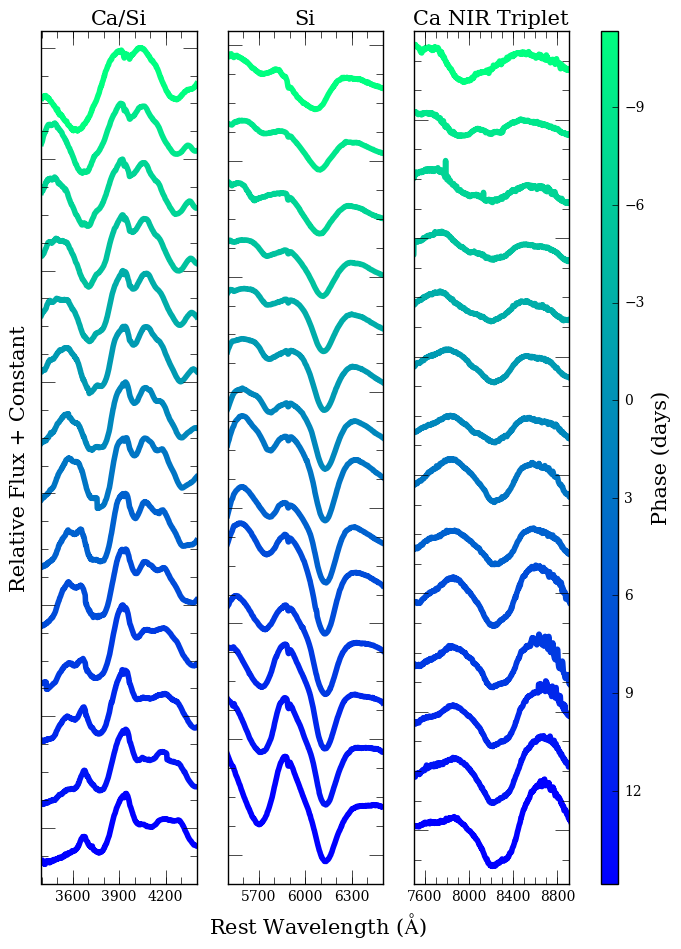

In [45]:
zoom_list = composites[0:26]
zoom_in_plot(zoom_list)

In [60]:
import dill

In [61]:
dill.dump_session('../../../Notebook_Backups/temporal_plots.db')

PicklingError: Can't pickle <class 'composite.supernova'>: it's not the same object as composite.supernova